In [1]:
import pandas as pd
import numpy as np
import pathlib
import datetime
from datetime import datetime, timedelta, date
from rich import print
from collections import namedtuple
from dataclasses import dataclass, asdict
import operator
import tomllib
import tomlkit as tml
import json
import xarray as xr
import csvb.ingest as ci
import plotly.express as px
import plotly.graph_objects as go
from collections import namedtuple
#from decimal import Decimal, getcontext

#getcontext().prec = 2
pd.options.mode.copy_on_write = True

In [2]:
Transaction = namedtuple("Transaction", ["Date", "Amount", "From", "To", "Description", "Notes"], defaults=[""])

In [3]:
HOME = pathlib.Path.home()
cfgpth = HOME / ".config" / "csvb" / "config.toml"
with open(cfgpth, 'rb') as f:
    cfg = tomllib.load(f)
RULESPTH = HOME / cfg["paths"]["rules"]
BANKPTH = HOME / cfg["paths"]["bank"]
PRODUCTSPTH = HOME / cfg["paths"]["products"]
ACCT_NAMES = ["Type", "Account", "Subaccount"]

In [4]:
fd  = ci.find_bank_files(HOME / pathlib.Path(cfg["paths"]["bank"])) 

In [5]:
try:
    del apl
except NameError:
    pass
apl = ci.ingest_bank_files(fd["Liabilities:Apple:Credit Card"]["files"],
                           fd["Liabilities:Apple:Credit Card"],
                           RULESPTH)

apl = ci.read_and_apply(apl, RULESPTH / fd["Liabilities:Apple:Credit Card"]["rules_file"])
apl[apl["From"] == ""]

Empty DataFrame
Columns: [Transaction Date, Clearing Date, Description, Merchant, Category, Type, Amount (USD), Purchased By, Amount, From]
Index: []

In [6]:
try:
    del apl_inc
except NameError:
    pass
apl_inc = ci.ingest_bank_files(fd["Liabilities:Apple:Installments"]["files"],
                           fd["Liabilities:Apple:Installments"],
                           RULESPTH)

apl_inc[apl_inc["From"] == ""]

Empty DataFrame
Columns: [Date, Description, Amount, From]
Index: []

In [7]:
try:
    del fst
except NameError:
    pass
fst = ci.ingest_bank_files(fd["Assets:1st Source:Checking"]["files"],
                           fd["Assets:1st Source:Checking"],
                           RULESPTH)

fst = ci.read_and_apply(fst, RULESPTH / fd["Assets:1st Source:Checking"]["rules_file"])

fst[fst["From"] == ""]

Empty DataFrame
Columns: [Transaction Number, Date, Description, Memo, Amount Debit, Amount Credit, Balance, Amount, From, Check Number, Fees  ]
Index: []

In [8]:
try:
    del ally
except NameError:
    pass
ally = ci.ingest_bank_files(fd["Assets:Ally:Savings"]["files"],
                           fd["Assets:Ally:Savings"],
                           RULESPTH)

ally = ci.read_and_apply(ally, RULESPTH / fd["Assets:Ally:Savings"]["rules_file"])

ally[ally["From"] == ""]

Empty DataFrame
Columns: [Date, Time, Amount, Type, Description, From]
Index: []

In [9]:
try:
    del ndfcu
except NameError:
    pass
ndfcu = ci.ingest_bank_files(fd["Liabilities:NDFCU:Credit Card"]["files"],
                           fd["Liabilities:NDFCU:Credit Card"],
                           RULESPTH)

ndfcu = ci.read_and_apply(ndfcu, RULESPTH / fd["Liabilities:NDFCU:Credit Card"]["rules_file"])

ndfcu[ndfcu["From"] == ""]
ndfcu[pd.isnull(ndfcu["From"])]

Empty DataFrame
Columns: [Date, Note, Description, Amount, Balance, From]
Index: []

In [10]:
try:
    del hsa
except NameError:
    pass
hsa = ci.ingest_bank_files(fd["Assets:Fidelity:HSA"]["files"],
                           fd["Assets:Fidelity:HSA"],
                           RULESPTH)
hsa = hsa.rename(columns={"Run Date": "Date",
                          "Action": "Description",
                          "Description": "Note",
                          "Amount ($)": "Amount",
                          
                         }
                )

hsa = ci.read_and_apply(hsa, RULESPTH / fd["Assets:Fidelity:HSA"]["rules_file"])
hsa
#hsa[pd.isnull(hsa["From"])]

Date                                        Description  Symbol  \
0  2023-12-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
1  2023-12-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
2  2023-12-22     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
3  2023-12-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
4  2023-11-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
5  2023-11-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
6  2023-11-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
7  2023-10-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
8  2023-10-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
9  2023-10-03     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
10 2023-09-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
11 2023-09-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
12 2023-09-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
13 2023-08-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
14 2023-08-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
15 2023-08-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
16 2023-07-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
17 2023-07-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
18 2023-07-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
19 2023-06-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
20 2023-06-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
21 2023-06-21   DEBIT CARD PURCHASE NOTRE DAME WELLNESS CE NO...           
22 2023-06-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
23 2023-05-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
24 2023-05-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
25 2023-05-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
26 2023-04-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
27 2023-04-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
28 2023-04-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
29 2023-03-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
30 2023-03-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
31 2023-03-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
32 2023-02-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
33 2023-02-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
34 2023-02-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
35 2023-02-02         CO CONTR CURRENT YR EMPLOYER CUR YR (Cash)           
36 2023-01-04   EXCHANGED TO FDRXX FIDELITY GOVERNMENT CASH R...   FDRXX   
0  2024-06-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
1  2024-05-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
2  2024-05-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
3  2024-05-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
4  2024-04-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
5  2024-04-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
6  2024-04-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
7  2024-03-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
8  2024-03-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
9  2024-03-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
10 2024-02-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   FDRXX   
11 2024-02-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   FDRXX   
12 2024-02-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)           
13 2024-02-02         CO CONTR CURRENT YR EMPLOYER CUR YR (Cash)           
14 2024-01-31   REINVESTMENT FIDELITY GOVERNMENT CASH RES

In [11]:
bank_tables = {"Assets:1st Source:Checking": fst,
               "Liabilities:Apple:Credit Card": apl.rename(columns={"Transaction Date": "Date"}),
              "Assets:Ally:Savings": ally,
              "Liabilities:NDFCU:Credit Card": ndfcu,
              "Liabilities:Apple:Installments": apl_inc,
              "Assets:Fidelity:HSA": hsa}


trans = ci.to_transactions(bank_tables)
trans = trans.sort_values("Date")

In [12]:
try:
    del bal_decl
except NameError:
    pass

bal_decl = pd.read_csv(HOME / pathlib.Path(cfg["paths"]["bank"]) / "balances.csv",
                  header=0,
                  parse_dates=["Date"])


In [13]:
trans = pd.concat([trans, ci.gen_init_balance_trans(bal_decl)], ignore_index=True).sort_values("Date")
trans[trans["To"] == "Assets:Fidelity:HSA"]

Date                                        Description  Amount  \
2614 2022-12-31                                    Initial Balance    0.00   
1078 2023-01-04   EXCHANGED TO FDRXX FIDELITY GOVERNMENT CASH R...    0.00   
1158 2023-02-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1159 2023-02-02         CO CONTR CURRENT YR EMPLOYER CUR YR (Cash)  500.00   
1221 2023-02-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -2.33   
1218 2023-02-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    2.33   
1234 2023-03-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1317 2023-03-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    3.84   
1312 2023-03-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -3.84   
1332 2023-04-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1385 2023-04-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    4.84   
1381 2023-04-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -4.84   
1404 2023-05-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1486 2023-05-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    6.47   
1478 2023-05-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -6.47   
1496 2023-06-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1564 2023-06-21   DEBIT CARD PURCHASE NOTRE DAME WELLNESS CE NO...   -7.89   
1608 2023-06-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    7.33   
1605 2023-06-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -7.33   
1622 2023-07-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1687 2023-07-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   -8.77   
1688 2023-07-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...    8.77   
1702 2023-08-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1776 2023-08-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -10.40   
1777 2023-08-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   10.40   
1800 2023-09-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1855 2023-09-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -11.13   
1856 2023-09-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   11.13   
1877 2023-10-03     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
1970 2023-10-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   12.91   
1969 2023-10-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -12.91   
1985 2023-11-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2076 2023-11-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -13.68   
2078 2023-11-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   13.68   
2097 2023-12-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2151 2023-12-22     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2172 2023-12-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   15.60   
2170 2023-12-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -15.60   
2288 2024-01-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -16.76   
2282 2024-01-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   16.76   
2303 2024-02-02         CO CONTR CURRENT YR EMPLOYER CUR YR (Cash)  500.00   
2302 2024-02-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2427 2024-02-29   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   18.23   
2425 2024-02-29   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -18.23   
2442 2024-03-05     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2510 2024-03-28   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   21.25   
2511 2024-03-28   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -21.25   
2540 2024-04-02     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)  279.16   
2606 2024-04-30   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...  -21.74   
2605 2024-04-30   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   21.74   
2609 2024-05-02     PARTIC CONTR 

In [14]:
try:
    del ledgers
except NameError:
    pass
    
#ledgers = create_ledgers(trans)
#ledgers = ci.trans_to_ledgers(trans, bal_decl=bal_decl)
#ledgers[ledgers["Account"] == "Assets:1st Source:Checking"]
#ledgers[ledgers["Transaction Pair"] == "Liabilities:Auto:Loan"]
fg = trans.groupby("From")
tg = trans.groupby("To")
fl = {}
for acct in fg.groups:
    fl[acct] = trans.loc[fg.groups[acct]][["Date", "Description", "To"]].rename(columns={"To": "Transaction Pair"})
                                                                                                       
    fl[acct]["Incoming Amount"] = - 1 * trans.loc[fg.groups[acct]]["Amount"]
    fl[acct]["Account String"] = [acct] * len(fl[acct])

tl = {}
for acct in tg.groups:
    tl[acct] = trans.loc[tg.groups[acct]][["Date", "Description", "From"]].rename(columns={"From": "Transaction Pair"})
                                                                                                       
    tl[acct]["Incoming Amount"] = trans.loc[tg.groups[acct]]["Amount"]
    tl[acct]["Account String"] = [acct] * len(tl[acct])

ledgers = pd.concat(list(tl.values()) + list(fl.values())).sort_values("Date", ignore_index=True)

# Split account string to tuples.
acct_tuples = ledgers["Account String"].apply(lambda t:ci.to_triple(t, fill="")).apply(pd.Series).rename(columns=dict(zip(range(3), ACCT_NAMES)))
ledgers = pd.concat([ledgers, acct_tuples], axis="columns")

# Calculate cumulative balance.
ledgers["Balance"] = ledgers.groupby("Account String")["Incoming Amount"].cumsum()

ledgers


Date                                        Description  \
0    2021-12-31                                    Initial Balance   
1    2021-12-31                                    Initial Balance   
2    2021-12-31                                    Initial Balance   
3    2021-12-31  MARTIN S SUPERMARKE      . SOUTHBEND    . IN 0000   
4    2021-12-31  PHILLIPS 66 - 0082 FIR   . MISHAWAKA    . IN 0000   
...         ...                                                ...   
5237 2024-05-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   
5238 2024-05-31   REINVESTMENT FIDELITY GOVERNMENT CASH RESERVE...   
5239 2024-05-31   DIVIDEND RECEIVED FIDELITY GOVERNMENT CASH RE...   
5240 2024-06-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)   
5241 2024-06-04     PARTIC CONTR CURRENT PARTICIPANT CUR YR (Cash)   

            Transaction Pair  Incoming Amount                  Account String  \
0     Equity:Initial Balance          5067.54      Assets:1st Source:Checking   
1     Equity:Initial Balance         -2522.77   Liabilities:Apple:Credit Card   
2     Equity:Initial Balance          -738.94  Liabilities:Apple:Installments   
3         Expenses:Groceries           -86.95   Liabilities:NDFCU:Credit Card   
4         Expenses:Auto:Fuel           -26.93   Liabilities:NDFCU:Credit Card   
...                      ...              ...                             ...   
5237     Assets:Fidelity:HSA           -23.78                 Income:Interest   
5238     Assets:Fidelity:HSA            23.78             Assets:Fidelity:HSA   
5239         Income:Interest            23.78             Assets:Fidelity:HSA   
5240     Assets:Fidelity:HSA          -279.16                 Income:Paycheck   
5241         Income:Paycheck           279.16             Assets:Fidelity:HSA   

             Type     Account    Subaccount  Balance  
0          Assets  1st Source      Checking  5067.54  
1     Liabilities       Apple   Credit Card -2522.77  
2     Liabilities       Apple  Installments  -738.94  
3     Liabilities       NDFCU   Credit Card   -86.95  
4     Liabilities       NDFCU   Credit Card  -113.88  
...           ...         ...           ...      ...  
5237       Income    Interest                -639.57  
5238       Assets    Fidelity           HSA  5633.95  
5239       Assets    Fidelity           HSA  5657.73  
5240       Income    Paycheck               -5745.72  
5241       Assets    Fidelity           HSA  5936.89  

[5242 rows x 9 columns]

In [15]:
#g = ledge_with_acct["Incoming Amount"].groupby(ledge_with_acct.index).sum("Incoming Amount")
# Select all lines with an initial balance.

clear_virtuals=True

start_date = None
end_date = None #date(2024,1,1)

ltable = ledgers

if start_date is not None:
    ltable = ltable[ltable["Date"] >= pd.Timestamp(start_date)]
if end_date is not None:
    ltable = ltable[ltable["Date"] <= pd.Timestamp(end_date)]


# Group on Accounts
acct_g = ltable.groupby(ACCT_NAMES)

# Choose first and last date of each group from ltable, reassign with column names and set account as multiindex.
start = acct_g.head(1)[["Date", "Balance"] + ACCT_NAMES].rename(columns={"Date": "Start Date", "Balance": "Initial Balance"}).set_index(ACCT_NAMES)
end = acct_g.tail(1)[["Date", "Balance"] + ACCT_NAMES].rename(columns={"Date": "End Date", "Balance": "End Balance"}).set_index(ACCT_NAMES)

#br = br.set_index(pd.MultiIndex.from_tuples(br.index.to_series().apply(ci.to_triple), names=["Type", "Account", "Subaccount"])a
br = pd.concat([start, end],axis="columns")
br["Difference"] = br["End Balance"] - br["Initial Balance"]
br
#acct_g["Date"].groups["Expenses:Reimbursible"]

Start Date  Initial Balance   End Date  \
Type        Account       Subaccount                                            
Assets      1st Source    Checking     2021-12-31          5067.54 2024-04-30   
Liabilities Apple         Credit Card  2021-12-31         -2522.77 2024-04-30   
                          Installments 2021-12-31          -738.94 2024-04-30   
            NDFCU         Credit Card  2021-12-31           -86.95 2024-04-26   
Expenses    Subscriptions              2021-12-31            14.99 2024-04-28   
...                                           ...              ...        ...   
            Interest                   2023-02-02            25.00 2024-02-21   
            Medical       Dentist      2023-05-26           114.00 2023-05-26   
            Auto          Gas          2023-06-13             7.08 2024-04-26   
            Services                   2024-03-10            59.95 2024-03-10   
            Recovery                   2024-03-13           255.94 2024-03-13   

                                        End Balance  Difference  
Type        Account       Subaccount                             
Assets      1st Source    Checking          6675.63     1608.09  
Liabilities Apple         Credit Card      -1572.51      950.26  
                          Installments     -1836.99    -1098.05  
            NDFCU         Credit Card       -742.47     -655.52  
Expenses    Subscriptions                   4310.15     4295.16  
...                                             ...         ...  
            Interest                         150.00      125.00  
            Medical       Dentist            114.00        0.00  
            Auto          Gas                 80.17       73.09  
            Services                          59.95        0.00  
            Recovery                         255.94        0.00  

[65 rows x 5 columns]

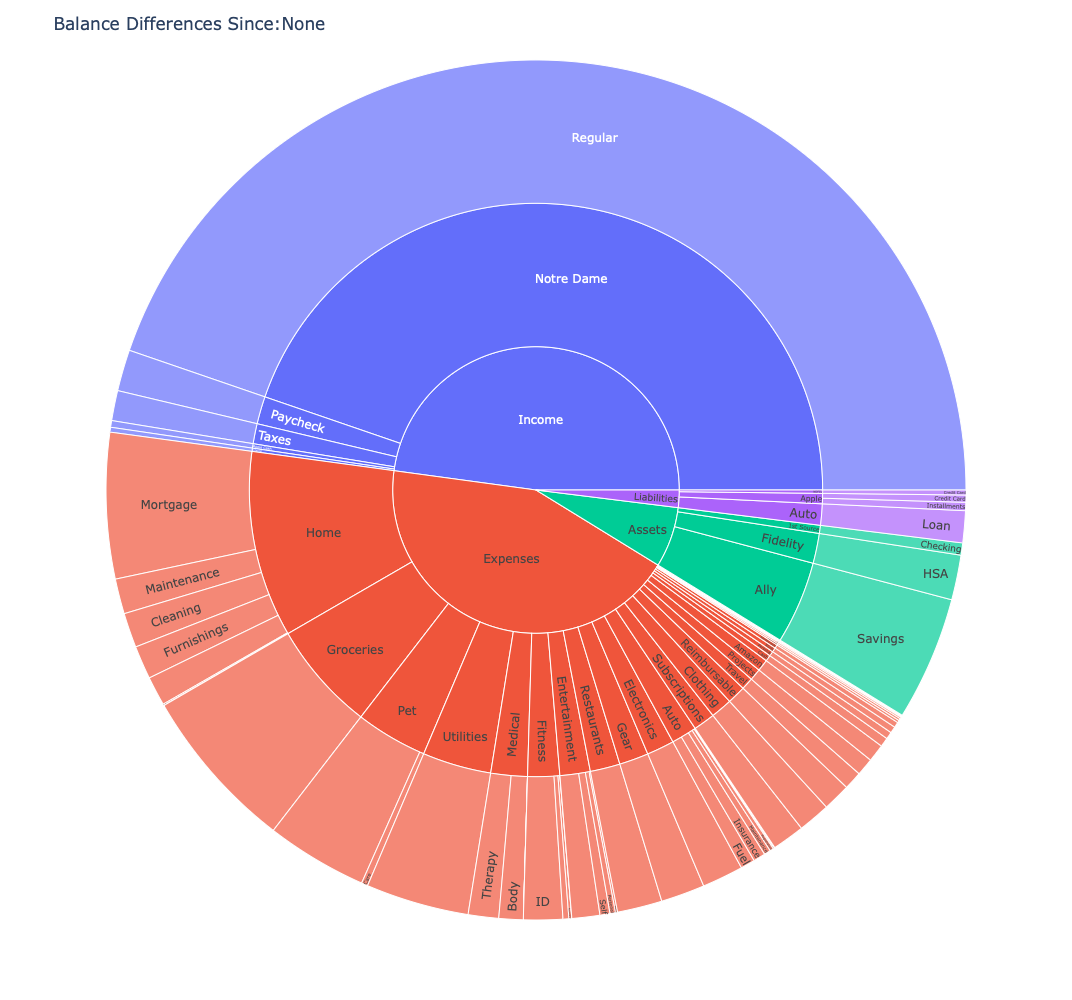

In [16]:
#cutoff_ledgers["Liabilities:Auto:Loan"].iloc[-2:-1]
#cb = ci.balances(ledgers)
#cb
df = br
df = pd.DataFrame({"Type": df.index.get_level_values("Type"),
                   "Account": df.index.get_level_values("Account"),
                   "Subaccount": df.index.get_level_values("Subaccount"),
                   "Difference": df["Difference"].apply(np.abs)})
df = df.loc[df["Type"] != "Transfer"]
df = df.loc[df["Type"] != "Equity"]
df = df.fillna("")
df = df.replace(np.inf,0)
#df = df.loc[
sbfig = px.sunburst(df, path=["Type", "Account", "Subaccount"], values="Difference")
sbfig.update_layout(height=1000, title=f"Balance Differences Since:{str(start_date)}")
sbfig.show()
#sbfig.data

In [17]:
#flow = trans.groupby(["From", "To"])
pt = trans.copy()
pt.loc[trans["Amount"] < 0, "To"] = trans.loc[trans["Amount"] < 0, "From"]
pt.loc[trans["Amount"] < 0, "From"] = trans.loc[trans["Amount"] < 0, "To"]
pt.loc[trans["Amount"] < 0, "Amount"] = -1 * trans.loc[trans["Amount"] < 0, "Amount"]
flow = pt.groupby(["From", "To"])
flow_df = pd.DataFrame(flow.Amount.aggregate("sum"))

In [18]:
accts = list(ci.accounts(flow_df.index.to_frame()))

labels = accts
sources = [accts.index(a) for a in flow_df.index.to_frame()["From"].values]
targets = [accts.index(a) for a in flow_df.index.to_frame()["To"].values]
values = flow_df["Amount"]

f = go.Figure(data=[go.Sankey(
    node = dict(
        pad=15,
        thickness = 5,
        line=dict(color = "black", width = 0.5),
        label = labels
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values.values,
    )
)
                   ]
             )


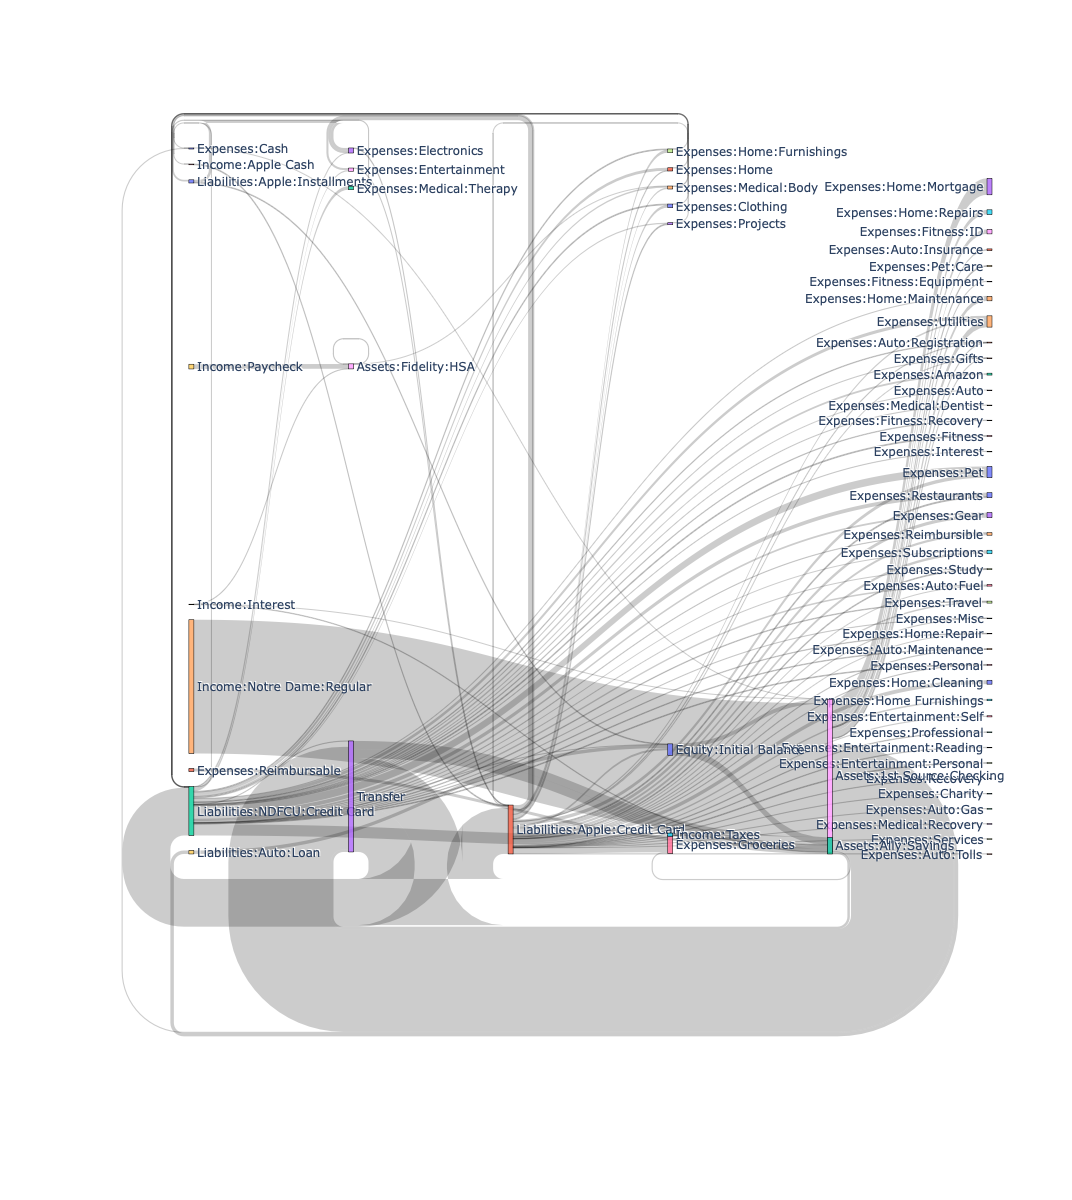

In [19]:
f.update_layout(height=1200)
f.show()

In [20]:
ltable = ledgers.sort_values("Date")
ltable = ltable[ltable["Date"] >= pd.Timestamp("2022-12-31")]
acct_g = ltable.groupby(ACCT_NAMES)
# We need a df of zero items to make resample create zeros for every month in the time frame.
# Otherwise, the means aren't correct over the full time frame.

# Find the groups for which the first date isn't the min and the last date isn't the max in ltable.
# Then create a df with a row for each account that doens't start at the first date or end at the end date.
# The following line, fines the groups that do'nt match, makes a df, then assigns the constant start or end value.
zeros=pd.concat([pd.DataFrame(~(acct_g["Date"].min() == ltable["Date"].min())).assign(Date=ltable["Date"].min()),
                 pd.DataFrame(~(acct_g["Date"].max() == ltable["Date"].max())).assign(Date=ltable["Date"].max())], axis="rows")
# Now fill out the other values and make the multi index a set of rows so that we can add it to ltable.
zeros = zeros.assign(Description="Fake Zero", Balance=0.0, Amount=0.0).rename(columns={"Amount": "Incoming Amount"})
#zeros[zeros["Date"] == ltable["Date"].max()]]
zeros.loc[zeros["Date"] == ltable["Date"].max(), "Balance"] = acct_g.last()["Balance"]
zeros.loc[:, "Account String"] = zeros.index.to_series().apply(":".join)
ltable = pd.concat([ltable, zeros.reset_index()], axis="rows").reset_index(drop=True)
acct_g = ltable.groupby(ACCT_NAMES)

monthly_sum = ltable.set_index("Date").sort_index().groupby(by=ACCT_NAMES).resample("ME", kind="period").sum()["Incoming Amount"]
monthly_mean = monthly_sum.groupby(ACCT_NAMES).mean()
#monthly_mean = pd.concat([monthly_mean, monthly_sum.groupby(ACCT_NAMES).std().rename("std")], axis="columns")
#monthly_sum.groupby(ACCT_NAMES)

/var/folders/42/qqsltqsj6fl30wl4xm41gs4m0000gn/T/ipykernel_19969/3741240659.py:16: PerformanceWarning:

indexing past lexsort depth may impact performance.



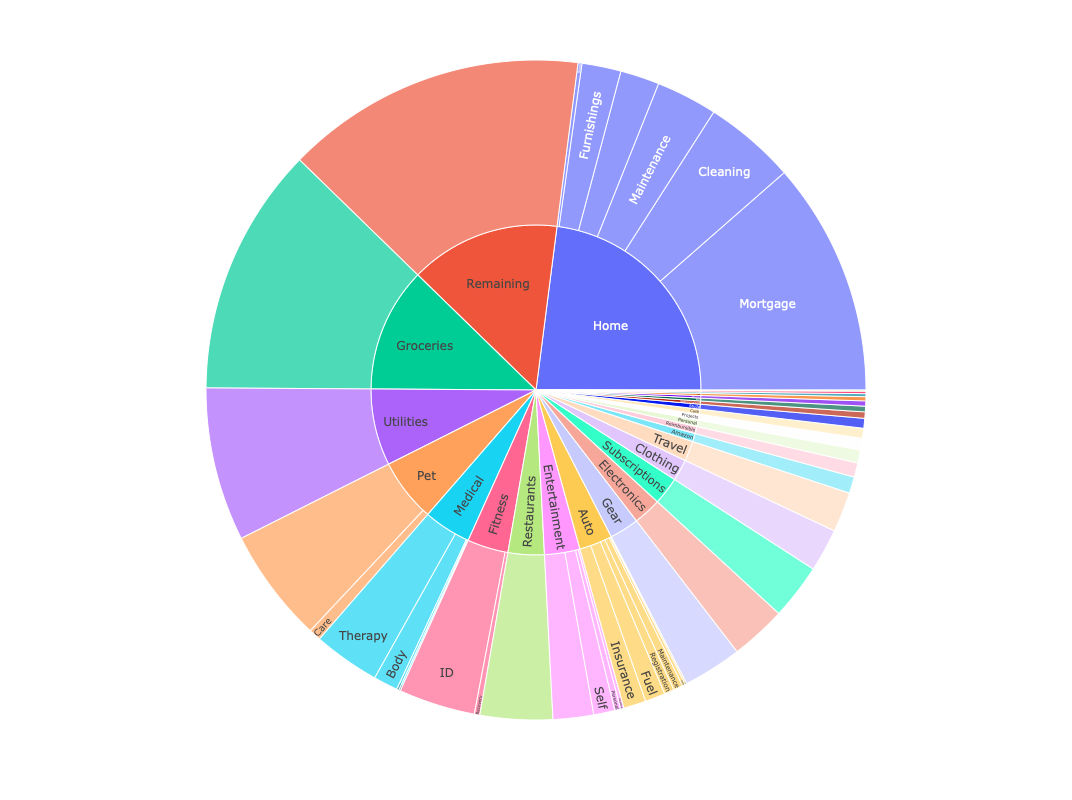

In [21]:
mean_expenses = monthly_mean["Expenses"]
#mean_expenses.index = mean_expenses.index.to_series().apply(":".join)
#px.pie(mean_expenses.sort_values(), height=600)
sb_mean_exp = mean_expenses.reset_index()

df = pd.concat([sb_mean_exp, pd.DataFrame({"Account": "Remaining",
                                       "Subaccount":"",
                                      "Incoming Amount": 5335.69 - sb_mean_exp.sum()["Incoming Amount"]},
                                    index=[sb_mean_exp.index[-1]+1])])
px.sunburst(df, path=["Account", "Subaccount"], values="Incoming Amount", height=800)

In [22]:
monthly_mean

Type         Account           Subaccount  
Assets       1st Source        Checking         148.500526
             Ally              Savings          864.166316
             Fidelity          HSA              312.467895
Equity       Initial Balance                   -458.777895
Expenses     Amazon                              43.155263
             Auto              Fuel              53.091579
                               Gas                4.219474
                               Insurance         59.016316
                               Maintenance       24.786316
                               Registration      25.882632
                               Tolls              7.870526
             Cash                                26.315789
             Charity                              6.426316
             Clothing                           113.066316
             Electronics                        146.697895
             Entertainment                      106.653684
            

In [23]:
pmsum = monthly_sum["Expenses"].reset_index()
pmsum["Acctstr"] = pmsum["Account"] + ":" + pmsum["Subaccount"]
pmsum["Date"] = pmsum["Date"].astype(object).apply(pd.Period.to_timestamp)